# scipy introduction

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

## special functions from scipy.special

### 1. gamma functions

In [96]:
from scipy.special import gamma
n = [-3/2, -1/2, 1, 1/2, 3/2, 5/2]
for i in n:
    print(f"gamma ({i}):", gamma(i))

gamma (-1.5): 2.363271801207355
gamma (-0.5): -3.5449077018110318
gamma (1): 1.0
gamma (0.5): 1.7724538509055159
gamma (1.5): 0.8862269254527579
gamma (2.5): 1.329340388179137


### 2. gamma function as an improper integral

In [97]:
from scipy.integrate import quad

def f(x):
    return (x**3) * exp(-x)

i, e = quad(f, 0, np.inf)
print(f"Result: {i}, Error: {e}")

Result: 6.0, Error: 2.9915229077545863e-09


In [98]:
A = np.linspace(0, 1000, 2000) #gradually increasing upper limit to a large value
ival = np.array([quad(f, 0, a)[0] for a in A]) 

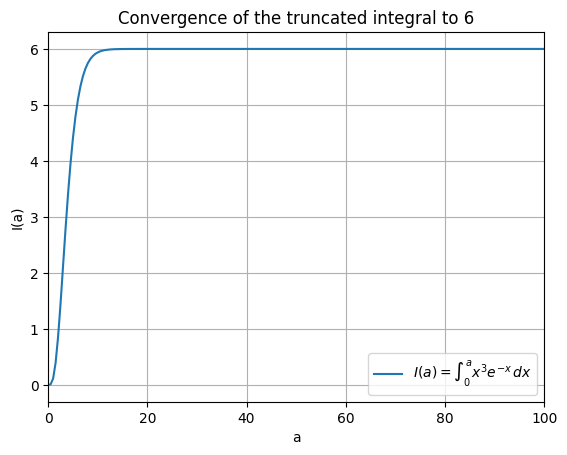

In [99]:
plt.plot(A, ival, label = r'$I(a) = \int_0^a x^3 e^{-x}\, dx$')
plt.xlabel('a')
plt.ylabel('I(a)')
plt.title("Convergence of the truncated integral to 6")
plt.xlim(0,100)
plt.legend()
plt.grid()

### 3. improper integral using quad

In [100]:
def f1(x):
    return 1/sqrt(1 - x**2)

quad(f1, 0, 1)

(1.570796326794894, 5.44135847491134e-11)

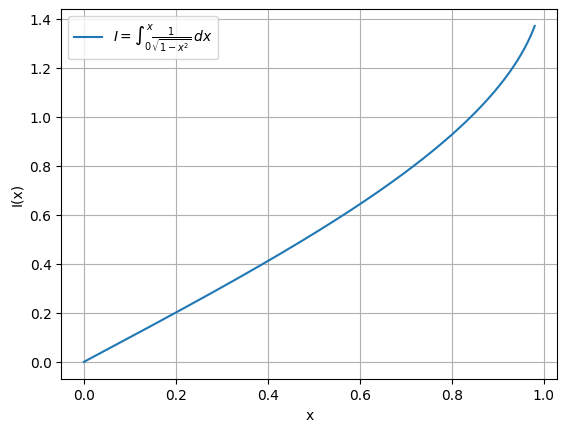

In [101]:
x = np.linspace(0, 0.98, 1000)
I = np.array([quad(f1, 0, i)[0] for i in x])
plt.plot(x, I, label = r'$ I= \int_0^x \frac{1}{\sqrt{1 - x^2}}\,dx$')
plt.xlabel('x')
plt.ylabel('I(x)')
plt.legend()
plt.grid(True)

### 4. Bose - Einstein Integral using Gauss Quadrature 

Result from Gauss Quadrature: 1.644934060755458
Result from quad: 1.6449340668482264
Analytical Result: 1.6449340668482264


/tmp/ipykernel_6659/511838460.py:6: RuntimeWarning: overflow encountered in exp
  return x/(np.exp(x) - 1)


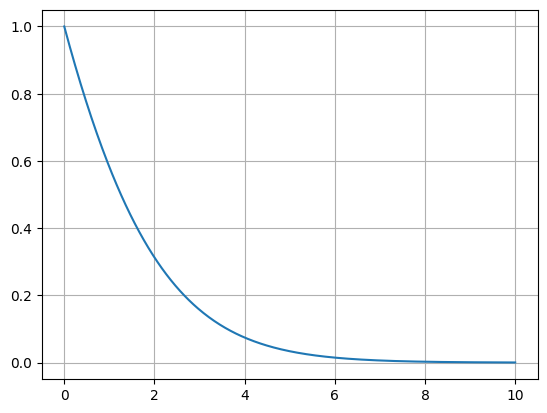

In [102]:
V = np.loadtxt("gauss32.dat")
ws = V[:, 1]
xs = V[:, 2]

def f2(x):
    return x/(np.exp(x) - 1)

a = 0
b = np.inf
ts = (1 + xs)/(1 -xs)
ys = f2(ts) * (2/(1 - xs)**2)
Inte = np.sum(ws * ys) 
print(f"Result from Gauss Quadrature: {Inte}")
print(f"Result from quad: {quad(f2, 0, np.inf)[0]}")
print(f"Analytical Result: {(np.pi**2)/6}")

x = np.linspace(1e-6, 10, 500)
y = f2(x)
plt.plot(x, y)
plt.grid(True)
plt.show()

### 5. legendre polynomials : plotting, orthogonality and recurrence 

In [76]:
#orthogonality relation of legendre polynomials

from scipy.special import legendre
from scipy.integrate import quad

m = int(input("Enter m:"))
n = int(input("Enter n:"))

def ortho(m, n):
    f = legendre(m) * legendre(n)
    result, _ = quad(f, -1, 1)
    return result 

print(ortho(m,n))

if(m == n):
    check = 2/(2*n + 1)
    print("Result from calculation when m = n:", check)


Enter m: 2
Enter n: 2


0.4000000000000001
Result from calculation when m = n: 0.4


### 6. hermite polynomials: plotting, orthogonality, recurrence 

In [103]:
#orthogonality relation of hermite polynomials 

In [105]:
from scipy.special import hermite 
from scipy.integrate import quad 
from scipy.special import factorial

m = int(input("Enter m:"))
n = int(input("Enter n:"))
Hm = hermite(m)
Hn = hermite(n)

def ortho(m, n):
    Hm = hermite(m)
    Hn = hermite(n)
    f = lambda x: np.exp(-x**2) * Hm(x) * Hn(x)
    result, _ = quad(f, -np.inf, np.inf)
    return result 

print(ortho(m, n))

if(m == n):
    check = (2**n)*factorial(n)*sqrt(pi)
    print("Result from Calculation: ",check)

Enter m: 4
Enter n: 5


0.0


### 7. Fourier coefficients 

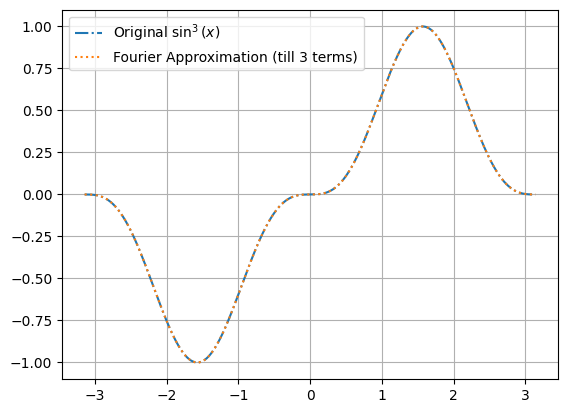

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

f = lambda x: np.sin(x) ** 3
l = np.pi

def an(n):
    integ = lambda x: f(x) * np.cos((n * np.pi * x)/l)
    val, _ = quad(integ, -l, l)
    return val/l

def bn(n):
    integ = lambda x: f(x) * np.sin((n * np.pi * x)/l)
    val, _ = quad(integ, -l, l)
    return val/l

N = 3 
a = [an(n) for n in range(N+1)]
b = [bn(n) for n in range(N+1)]

def fourier(x, N):
    result = a[0]/2
    for n in range(1, N+1):
        result += a[n] * np.cos((n*np.pi*x)/l) + b[n] * np.sin((n*np.pi*x)/l)

    return result

xs = np.linspace(-l, l, 1000)

plt.plot(xs, f(xs), ls = '-.', label = r'Original $\sin^3(x)$')
plt.plot(xs, [fourier(x, N) for x in xs], ls = ':', label = 'Fourier Approximation (till 3 terms)')
plt.grid(True)
plt.legend()
plt.show()

### 8. Dirac Delta Verification

10 16.05 16
100 16.005 16
1000 16.0005 16


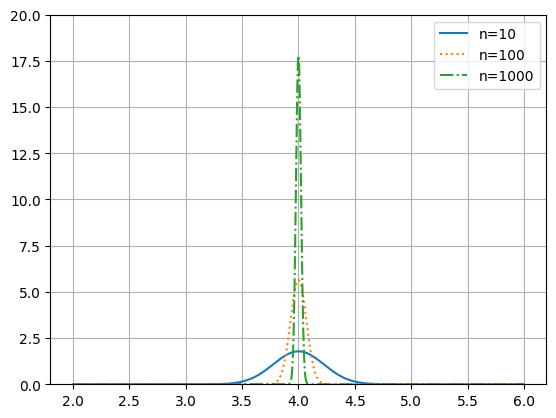

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def delta(n, a, x):
    return np.sqrt(n/np.pi)*np.exp(-n*(x - a)**2)

f = lambda x: x**2
a = 4

linestyles = ['-',':','-.']
n = [10, 100, 1000]

for i in n:
    y = lambda x: f(x) * delta(i, a, x)
    integrand = quad(y, 3, 6)
    print(i, np.round(integrand[0], 4), f(a))


x = np.linspace(a-2, a+2, 1000)
for i in range(3):
    plt.plot(x, delta(n[i], a, x), ls = linestyles[i], label=f'n={n[i]}')

plt.legend()
plt.grid(True)
plt.ylim(0,20)
plt.show()

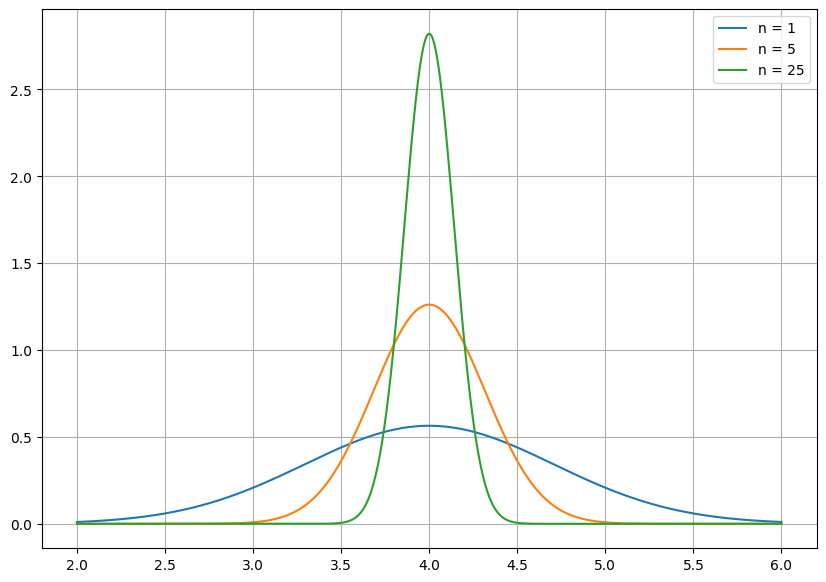

 the numerical integral is: 16.050000
 the numerical integral is: 16.100000
 the numerical integral is: 16.020000
the numerical integral converges to f(a) = 16.0.


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

a = 4.0

def f(x):
    return x**2

def dirac_delta_representation(x, a, n):
    return np.sqrt(n / np.pi) * np.exp(-n * (x - a)**2)

x_plot = np.linspace(a - 2, a + 2, 1000)
n_values_for_plot = [1, 5, 25]

plt.figure(figsize=(10, 7))

for n in n_values_for_plot:
    delta_vals = dirac_delta_representation(x_plot, a, n)
    plt.plot(x_plot, delta_vals, label=f'n = {n}')



plt.legend()
plt.grid(True)

plt.show()



def integrand_for_quad(x, a_val, n_val):
    return dirac_delta_representation(x, a_val, n_val) * f(x)

n_values_for_integral = [10, 5,25]

for n in n_values_for_integral:
    integral_result , integral_error= quad(
        integrand_for_quad, 2, 6, args=(a,n)
    )
    print(f" the numerical integral is: {integral_result:.6f}")

print(f"the numerical integral converges to f(a) = {f(a)}.")

### 9. odeint 

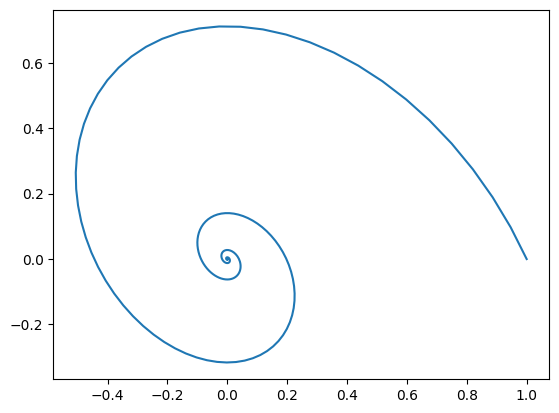

In [139]:
from scipy.integrate import odeint
gamma = 0.5
k = 1.0

t0 = 0
x0 = 0
v0 = 1.0

def eq(u, t):
    x, v = u
    dxdt = v
    dvdt = -k*x - (gamma*v)
    return[dxdt, dvdt]


t = np.linspace(0, 40, 401)
solution = odeint(eq, [x0, v0], t)

#plt.plot(t, solution[:, 0]) 
plt.plot(solution[:, 1], solution[:, 0]) 

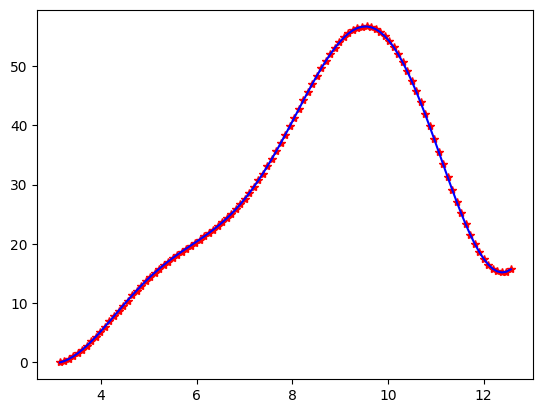

In [146]:
from scipy.integrate import odeint

def eq(y, x):
    y1, y2 = y
    dy1dx = y2
    dy2dx = 4*x + 10*np.sin(x) - y1
    return[dy1dx, dy2dx]

y10 = 0
y20 = 2

x = np.linspace(np.pi, 4*np.pi, 101)
sol = odeint(eq, [y10, y20], x)

yan = 9*np.pi*np.cos(x) + 7*np.sin(x) + 4*x - 5*x*np.cos(x)
plt.plot(x, sol[:, 0], 'r*')
plt.plot(x, yan, 'b-')

### 10. interpolation

In [150]:
x = [1, 3, 6, 7, 78, 4, 42, 45]
y = np.exp(x)

from scipy.interpolate import lagrange

poly = lagrange(x, y)
poly

poly1d([ 2.88920657e+21, -3.12034310e+23,  1.12158999e+25, -1.57866247e+26,
        1.05331515e+27, -3.49031178e+27,  5.33609874e+27, -2.75214261e+27])

In [155]:
poly.coef

array([ 2.88920657e+21, -3.12034310e+23,  1.12158999e+25, -1.57866247e+26,
        1.05331515e+27, -3.49031178e+27,  5.33609874e+27, -2.75214261e+27])

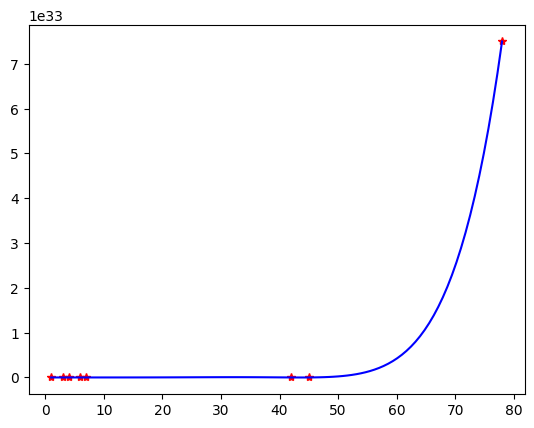

In [152]:
xf = np.linspace(1, 78, 100)
yf = poly(xf)

plt.plot(x, y, 'r*')
plt.plot(xf, yf, 'b-')

### 11. curve fitting

In [175]:
# Define quadratic model
def model(x, a, b, c):
    return a*x**2 + b*x + c

# Generate data
xdata = np.linspace(-5, 5, 50)
ytrue = 2*xdata**2 - 3*xdata + 5   # true relation
noise = 3 * np.random.normal(size=len(xdata))
ydata = ytrue + noise  

In [176]:
from scipy.optimize import curve_fit

In [177]:
popt, pcov = curve_fit(model, xdata, ydata)

In [178]:
afit, bfit, cfit = popt

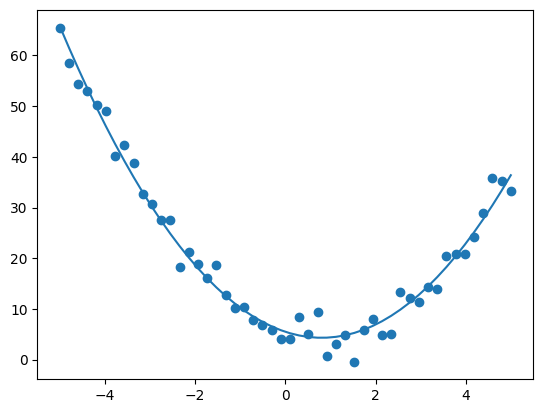

In [182]:
yfit = model(xdata, afit, bfit, cfit)
plt.scatter(xdata, ydata)
plt.plot(xdata, yfit)

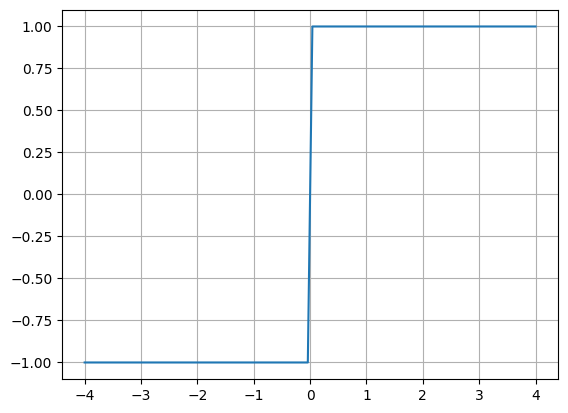

In [186]:
def square(x):
    return np.where(x<0, -1, 1)

x = np.linspace(-4, 4, 100)
y = square(x)

plt.plot(x, y)
plt.grid(True)
plt.show()
